# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [1]:
#import libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

In [2]:
#make the dataset with make_blobs
#your code here
X, y = make_blobs(n_samples=300, centers=4, n_features=2, cluster_std=0.6, random_state=0)


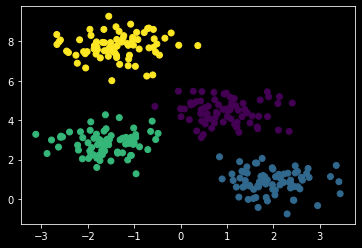

In [5]:
plt.scatter(X[:,0], X[:,1], c=y);

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [6]:
#implement square diff
# your code here
def square_diff(x1, x2):
    return (x1 - x2)**2

In [7]:
#implement root sum squares
#your code here
def root_sum_squared(sq_diff):
    return np.sqrt(np.sum(square_diff))

In [8]:
#implement the euclidean distances function
#your code here
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [9]:
#implement the evaluate function
#your code here
def evaluate(y_pred, y_true):
    score = np.sum(y_true == y_pred) / len(y_true)
    return score * 100


### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [10]:
#implement the predict function
#your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

def predict(X_train, X_test, y_train, k):

        # Initialize empty list to hold labels
        y_pred = []

        # Loop through each data to be predicted
        for x in X_test:

            # Calculate distances between x and all examples in the training set
            distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in X_train]

            # Sort by distance and return indices of the first k neighbors
            k_idx = np.argsort(distances)[:k]

            # Extract the labels of the k nearest neighbors
            k_neighbors_labels = [y_train[i] for i in k_idx]

            # Get the label/neighbor with majority vote(most common)            
            most_common = Counter(k_neighbors_labels).most_common(1)[0][0]

            # Append to list of labels/predictions
            y_pred.append(most_common)

        return np.array(y_pred)


In [11]:
predictions = predict(X_train, X_test, y_train, k=5)

In [12]:
predictions

array([3, 0, 2, 1, 0, 2, 3, 2, 2, 0, 3, 1, 3, 3, 0, 2, 3, 3, 0, 3, 3, 2,
       1, 2, 2, 3, 0, 1, 3, 2, 3, 0, 0, 0, 3, 0, 2, 3, 3, 1, 0, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 3, 0, 2, 2, 1, 0, 0, 3, 3, 0])

In [13]:
print('Accuracy {:0.2f}%'.format(evaluate(predictions, y_test)))

Accuracy 100.00%


In [63]:
print('Accuracy {:0.2f}%'.format(evaluate(predictions, y_true)))

Accuracy 17.67%


In [14]:
scores = {}
for k in range(1, 500, 2):
    
    predictions = predict(X_train, X_test, y_train, k)
    score = evaluate(predictions, y_test)
    scores[k] = score



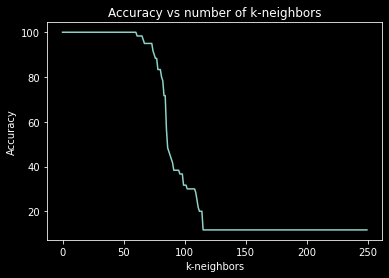

In [16]:
plt.plot(scores.values())
plt.title('Accuracy vs number of k-neighbors')
plt.ylabel('Accuracy')
plt.xlabel('k-neighbors');